##**Instagram Data Analysis**

Objective is to analysis the Statskew instagram account and predict which post helps in increasing profile visits and followers to make the better reach of this instagram account.

**Data Collection**

In [1]:
#load data
import pandas as pd
df=pd.read_csv('/content/sample_data/Instagram data.csv',encoding='latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
df.shape #check rows and columns

(119, 13)

In [ ]:
#check null values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
#data basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [ ]:
#get summary statistics
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


**EDA**

Now, lets look the distribution of impressions from various sources like from home page, from hashtags, from explore and from others.

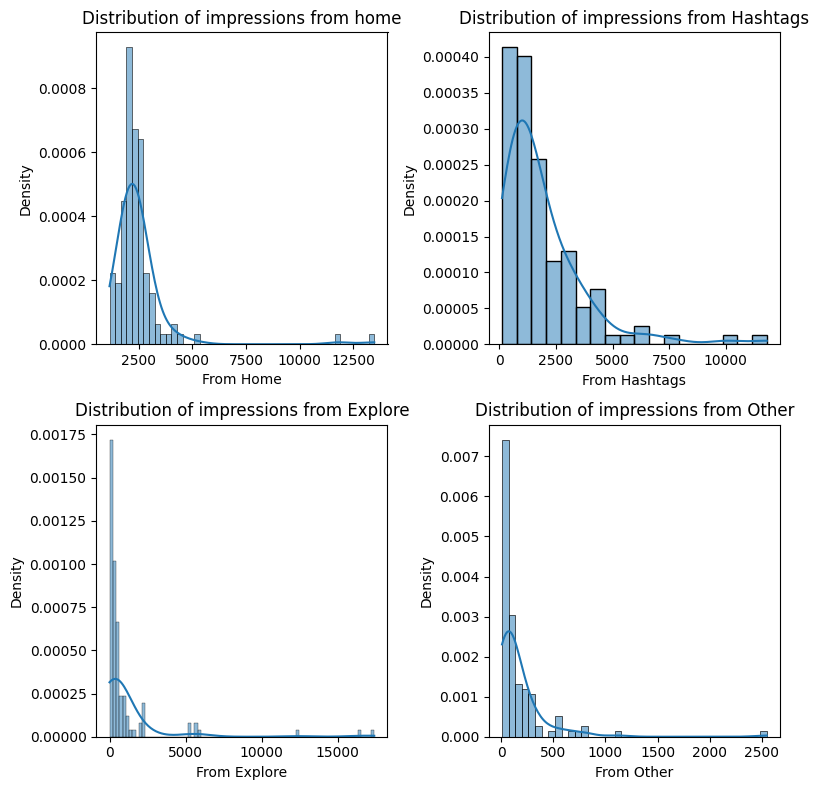

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(2,2,1)
sns.histplot(df['From Home'],kde=True,stat='density')
ax.set(title="Distribution of impressions from home")

ax=fig.add_subplot(2,2,2)
sns.histplot(df['From Hashtags'],kde=True,stat='density')
ax.set(title="Distribution of impressions from Hashtags")

ax=fig.add_subplot(2,2,3)
sns.histplot(df['From Explore'],kde=True,stat='density')
ax.set(title="Distribution of impressions from Explore")

ax=fig.add_subplot(2,2,4)
sns.histplot(df['From Other'],kde=True,stat='density')
ax.set(title="Distribution of impressions from Other")

plt.tight_layout()
plt.show()

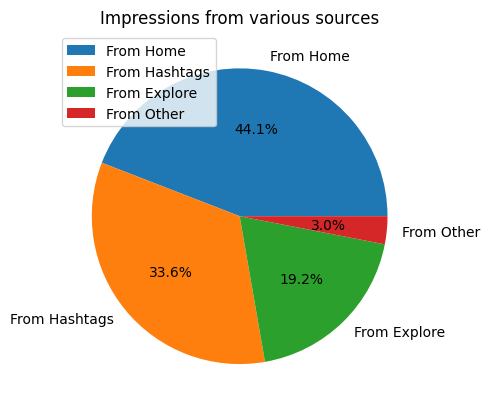

In [10]:
import matplotlib.pyplot as plt
home=df['From Home'].sum()
hashtag=df['From Hashtags'].sum()
explore=df['From Explore'].sum()
other=df['From Other'].sum()

labels=['From Home','From Hashtags','From Explore','From Other']
values=[home, hashtag, explore, other]

plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.title('Impressions from various sources')
plt.legend(loc='upper left')
plt.show()

From pie plot it's clear that we get more impression from home page of instagram.

Now, let's check which words are more frequently used in Caption

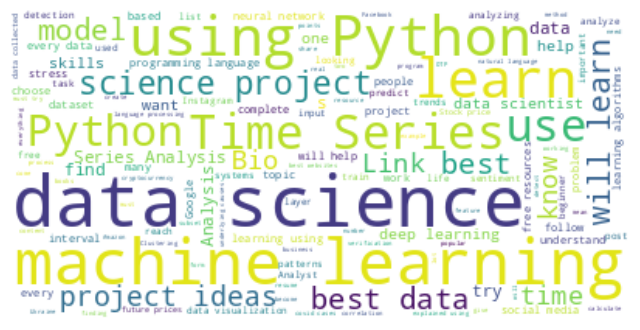

In [ ]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
text=" ".join(i for i in df.Caption)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(8,6))
plt.style.use('classic')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

From figure words like "data Science", "machine learning",
 "data", "Python", "Time Series" are used frequently

Now check how many people have become as follower to this Instagram account.


In [ ]:
conversion_rate=(df['Follows'].sum() / df['Profile Visits'].sum())*100
conversion_rate

41.00265604249668

we got conversion_rate = 41, this says 41% percent of people have become as follower remaining 59% percent of people have just visited the account but not followed.

In our dataframe Caption and Hashtags columns contain only text.
Lets clean this text.

In [ ]:
import re
def clean_text(text):
  text=re.sub('\s+',' ',text) #remove extra whitespaces
  text=re.sub('RT|cc',' ',text) #remove RT and cc
  text=re.sub('[%s]'% re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',text) #remove punctuations
  text=re.sub('#\S+','',text) #remove hashtags
  text=re.sub('http\S+\s*', ' ',text) #remove URLs
  text=re.sub(r'[^\x00-\x7f]',r' ',text)
  text=re.sub('@\S+','',text) #remove mentions
  return text

Create a new column 'Text' by combining 'Caption' and 'Hashtags' columns.

Create another column 'Conversion_rate'

In [ ]:
df['Text']=df['Caption']+df['Hashtags']
df['Conversion_rate']=df['Follows']/df['Profile Visits']

In [ ]:
#Clean the text by calling clean_text function
df['Text']=df['Text'].apply(lambda x: clean_text(x))
df['Caption_clean']=df['Caption'].apply(lambda x: clean_text(x))
df['Hashtags_clean']=df['Hashtags'].apply(lambda x: clean_text(x))

In [ ]:
df[['Text','Caption_clean','Hashtags_clean','Conversion_rate']].head()

,Text,Caption_clean,Hashtags_clean,Conversion_rate
0,Here are some of the most important data visua...,Here are some of the most important data visua...,finance money business investing investme...,0.057143
1,Here are some of the best data science project...,Here are some of the best data science project...,healthcare health covid data datascience ...,0.208333
2,Learn how to train a machine learning model an...,Learn how to train a machine learning model an...,data datascience dataanalysis dataanalytic...,0.193548
3,Here s how you can write a Python program to d...,Here s how you can write a Python program to d...,python pythonprogramming pythonprojects py...,0.347826
4,Plotting annotations while visualizing your da...,Plotting annotations while visualizing your da...,datavisualization datascience data dataana...,0.000000


In [ ]:
df['Conversion_rate'].describe()

count    119.000000
mean       0.381852
std        0.329570
min        0.000000
25%        0.190476
50%        0.315789
75%        0.461538
max        2.181818
Name: Conversion_rate, dtype: float64

Create 'Conversion_flag' column by setting a threshold value 0.50. If value is greater than threshold assign as 1 and 0 for value less than threshold.

If the convertion_rate is more than 50% percent consider it as 1 else 0

In [ ]:
import numpy as np
df['Conversion_flag']=np.where(df['Conversion_rate']>0.50,1,0)

In [ ]:
!pip install nltk

In [ ]:
df2=df.copy() #copying our dataframe df to another dataframe df2

In [ ]:
df2.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Text,Conversion_rate,Caption_clean,Hashtags_clean,Conversion_flag
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,Here are some of the most important data visua...,0.057143,Here are some of the most important data visua...,finance money business investing investme...,0
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,Here are some of the best data science project...,0.208333,Here are some of the best data science project...,healthcare health covid data datascience ...,0
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,Learn how to train a machine learning model an...,0.193548,Learn how to train a machine learning model an...,data datascience dataanalysis dataanalytic...,0
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,Here s how you can write a Python program to d...,0.347826,Here s how you can write a Python program to d...,python pythonprogramming pythonprojects py...,0
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,Plotting annotations while visualizing your da...,0.000000,Plotting annotations while visualizing your da...,datavisualization datascience data dataana...,0


In [ ]:
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#collect all the cleaned text, apply word tokenization and append in all_words.
set_of_stopwords=set(stopwords.words('english')+['``',"''"])
all_words=[]
sentences=df2['Text'].values
cleanedSentences=""
for records in sentences:
  cleanedText=clean_text(records)
  cleanedSentences+=cleanedText
  requiredwords=nltk.word_tokenize(cleanedText)
  for word in requiredwords:
    if word not in set_of_stopwords and word not in string.punctuation:
      all_words.append(word)

A frequency distribution is used to record the frequency of each word type in a document.

most_common() method returns a list of (element, count) tuples sorted by counts.

In [ ]:
wordfreqdist=nltk.FreqDist(all_words)
most_common_word=wordfreqdist.most_common(50)
print(most_common_word)

[('data', 200), ('NikhilSingh', 117), ('Statskew', 117), ('python', 109), ('machinelearning', 97), ('pythonprogramming', 95), ('datascience', 94), ('Here', 92), ('ai', 91), ('pythonprojects', 90), ('artificialintelligence', 89), ('dataanalytics', 87), ('datascientist', 83), ('pythoncode', 78), ('dataanalysis', 77), ('deeplearning', 75), ('Python', 54), ('learning', 52), ('science', 50), ('using', 43), ('machinelearningprojects', 43), ('datascienceprojects', 43), ('learn', 43), ('best', 39), ('machine', 38), ('programming', 37), ('time', 35), ('project', 26), ('coding', 26), ('technology', 25), ('tech', 23), ('computerscience', 21), ('know', 20), ('business', 20), ('bigdata', 20), ('ideas', 19), ('try', 19), ('pythonlearning', 19), ('pythondeveloper', 19), ('pythoncoding', 19), ('pythonprogrammer', 19), ('datavisualization', 19), ('Analysis', 19), ('If', 17), ('projects', 17), ('analytics', 16), ('analysis', 16), ('Time', 16), ('every', 15), ('algorithms', 15)]


This output says word 'data' has occured 200 times, 'NikhilSingh' occured 117 times, 'Statskew' occured 117 times and so on....

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

In [ ]:
model_text=df2['Text'].values
model_target=df2['Conversion_flag'].values
word_vectorizer=TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(model_text)
word_features=word_vectorizer.transform(model_text)
print('Feature extraction is completed')

Feature extraction is completed


Here word_features is independent variable and model_target is target variable.


**train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(word_features,model_target,random_state=42,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(95, 575)
(24, 575)


**Model Selection**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

**Model Evaluation**

In [ ]:
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.9789473684210527
Test score: 0.875


**Making Predictions**

In [ ]:
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

**Conclusion:**

our model is giving 87% accuracy.

The predicted values 1 indicates that particular post goes viral and make better reach of instagram account